In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import encodings #dataset might not be in desired format so to convert data using encode.
from matplotlib.gridspec import GridSpec
from matplotlib.offsetbox import AnchoredText
from matplotlib.backends.backend_pdf import PdfPages #to convert my plotted graphs to pdf
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder 

In [4]:
df=pd.read_csv("1.csv",encoding="latin1")

In [7]:
df.head(5)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,1/4/2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,1/4/2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,1/4/2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,1/4/2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,1/4/2009


In [9]:
df['Year']=pd.to_datetime(df['Year'])

In [16]:
df['Session']=df['Year'].dt.year

In [18]:
df.head(5)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year,Session
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009-01-04,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009-01-04,2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,2009-01-04,2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,2009-01-04,2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,2009-01-04,2009


In [21]:
df.drop('Year',axis=1,inplace=True)

ValueError: labels ['Year'] not contained in axis

In [23]:
df.head(5)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Session
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009
2,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),G. KOTHURU(023 ),G. KOTHURU(0404410023010600),Salinity,2009
3,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GAJJANAPUDI(06),GAJJANAPUDI(029 ),GAJJANAPUDI(0404410029010600),Salinity,2009
4,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),CHINTALURU(10),CHINTALURU(028 ),CHINTALURU(0404410028011000),Salinity,2009


In [25]:
df.rename(columns={'Session':'Year'},inplace=True)

In [27]:
df.head(2)

,State Name,District Name,Block Name,Panchayat Name,Village Name,Habitation Name,Quality Parameter,Year
0,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),VANTHADA(014 ),VANTHADA(0404410014010400),Salinity,2009
1,ANDHRA PRADESH,EAST GODAVARI(04),PRATHIPADU(10),GOKAVARAM(04),PANDAVULAPALEM(022 ),PANDAVULAPALEM(0404410022010400),Fluoride,2009


In [29]:
df.to_csv("wq.csv",index=True)

In [31]:
col=df.columns

In [33]:
state=df['State Name'].unique()

In [36]:
print(col)
print("-"*100)
print(state)

Index(['State Name', 'District Name', 'Block Name', 'Panchayat Name',
       'Village Name', 'Habitation Name', 'Quality Parameter', 'Year'],
      dtype='object')
----------------------------------------------------------------------------------------------------
['ANDHRA PRADESH' 'ASSAM' 'ARUNACHAL PRADESH' 'BIHAR' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'KARNATAKA' 'KERALA'
 'MADHYA PRADESH' 'MAHARASHTRA' 'MEGHALAYA' 'NAGALAND' 'ORISSA'
 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH'
 'WEST BENGAL' 'CHATTISGARH' 'JHARKHAND' 'UTTARAKHAND' 'MANIPUR'
 'CHHATTISGARH']


In [40]:
len(state)

27

In [42]:
len(col)

8

In [46]:
df['Quality Parameter'].unique()

array(['Salinity', 'Fluoride', 'Iron', 'Arsenic', 'Nitrate'], dtype=object)

In [48]:
df['Quality Parameter'].value_counts()

Iron        302244
Salinity    108923
Fluoride    101041
Arsenic      25705
Nitrate      12329
Name: Quality Parameter, dtype: int64

In [51]:
df['Quality Parameter'].groupby(df['State Name']).describe()

State Name               
ANDHRA PRADESH     count         2888
                   unique           2
                   top       Fluoride
                   freq          2193
ARUNACHAL PRADESH  count          612
                   unique           1
                   top           Iron
                   freq           612
ASSAM              count        79910
                   unique           3
                   top           Iron
                   freq         74098
BIHAR              count        92336
                   unique           4
                   top           Iron
                   freq         69970
CHATTISGARH        count        25062
                   unique           5
                   top           Iron
                   freq         24439
CHHATTISGARH       count         8815
                   unique           3
                   top           Iron
                   freq          8339
GUJARAT            count         2092
                   uniqu

In [53]:
des=df['Quality Parameter'].groupby(df['State Name']).describe()

In [55]:
des1=pd.DataFrame(eval('des'))

In [57]:
des1.to_csv('description.csv',index=True)

In [59]:
print(des1)

                         Quality Parameter
State Name                                
ANDHRA PRADESH    count               2888
                  unique                 2
                  top             Fluoride
                  freq                2193
ARUNACHAL PRADESH count                612
                  unique                 1
                  top                 Iron
                  freq                 612
ASSAM             count              79910
                  unique                 3
                  top                 Iron
                  freq               74098
BIHAR             count              92336
                  unique                 4
                  top                 Iron
                  freq               69970
CHATTISGARH       count              25062
                  unique                 5
                  top                 Iron
                  freq               24439
CHHATTISGARH      count               8815
           

In [61]:
df.groupby('State Name').size()

State Name
ANDHRA PRADESH         2888
ARUNACHAL PRADESH       612
ASSAM                 79910
BIHAR                 92336
CHATTISGARH           25062
CHHATTISGARH           8815
GUJARAT                2092
HARYANA                 262
HIMACHAL PRADESH         88
JAMMU AND KASHMIR        67
JHARKHAND              3913
KARNATAKA             30824
KERALA                 4800
MADHYA PRADESH        14449
MAHARASHTRA           12480
MANIPUR                  14
MEGHALAYA               427
NAGALAND                618
ORISSA                68620
PUDUCHERRY               17
PUNJAB                 1056
RAJASTHAN            131417
TAMIL NADU             3164
TRIPURA               26235
UTTAR PRADESH          9918
UTTARAKHAND              57
WEST BENGAL           30101
dtype: int64

In [64]:
data=df[['State Name','Quality Parameter']]

In [66]:
print(data)

            State Name Quality Parameter
0       ANDHRA PRADESH          Salinity
1       ANDHRA PRADESH          Fluoride
2       ANDHRA PRADESH          Salinity
3       ANDHRA PRADESH          Salinity
4       ANDHRA PRADESH          Salinity
5       ANDHRA PRADESH          Fluoride
6       ANDHRA PRADESH          Salinity
7       ANDHRA PRADESH          Fluoride
8       ANDHRA PRADESH          Salinity
9       ANDHRA PRADESH          Salinity
10      ANDHRA PRADESH          Salinity
11      ANDHRA PRADESH          Salinity
12      ANDHRA PRADESH          Salinity
13      ANDHRA PRADESH          Salinity
14      ANDHRA PRADESH          Salinity
15      ANDHRA PRADESH          Salinity
16      ANDHRA PRADESH          Salinity
17      ANDHRA PRADESH          Salinity
18      ANDHRA PRADESH          Salinity
19      ANDHRA PRADESH          Salinity
20      ANDHRA PRADESH          Salinity
21      ANDHRA PRADESH          Salinity
22      ANDHRA PRADESH          Salinity
23      ANDHRA P

In [68]:
number=LabelEncoder()

In [72]:
data['Quality']=number.fit_transform(data['Quality Parameter'].astype('str'))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [75]:
data.head(5)

,State Name,Quality Parameter,Quality
0,ANDHRA PRADESH,Salinity,4
1,ANDHRA PRADESH,Fluoride,1
2,ANDHRA PRADESH,Salinity,4
3,ANDHRA PRADESH,Salinity,4
4,ANDHRA PRADESH,Salinity,4


In [77]:
set1=data.groupby(['State Name','Quality Parameter','Quality']).count()

In [79]:
set1

Empty DataFrame
Columns: []
Index: [(ANDHRA PRADESH, Fluoride, 1), (ANDHRA PRADESH, Salinity, 4), (ARUNACHAL PRADESH, Iron, 2), (ASSAM, Arsenic, 0), (ASSAM, Fluoride, 1), (ASSAM, Iron, 2), (BIHAR, Arsenic, 0), (BIHAR, Fluoride, 1), (BIHAR, Iron, 2), (BIHAR, Nitrate, 3), (CHATTISGARH, Arsenic, 0), (CHATTISGARH, Fluoride, 1), (CHATTISGARH, Iron, 2), (CHATTISGARH, Nitrate, 3), (CHATTISGARH, Salinity, 4), (CHHATTISGARH, Fluoride, 1), (CHHATTISGARH, Iron, 2), (CHHATTISGARH, Salinity, 4), (GUJARAT, Fluoride, 1), (GUJARAT, Iron, 2), (GUJARAT, Nitrate, 3), (GUJARAT, Salinity, 4), (HARYANA, Fluoride, 1), (HARYANA, Salinity, 4), (HIMACHAL PRADESH, Arsenic, 0), (HIMACHAL PRADESH, Iron, 2), (HIMACHAL PRADESH, Salinity, 4), (JAMMU AND KASHMIR, Fluoride, 1), (JAMMU AND KASHMIR, Iron, 2), (JAMMU AND KASHMIR, Salinity, 4), (JHARKHAND, Arsenic, 0), (JHARKHAND, Fluoride, 1), (JHARKHAND, Iron, 2), (JHARKHAND, Nitrate, 3), (JHARKHAND, Salinity, 4), (KARNATAKA, Arsenic, 0), (KARNATAKA, Fluoride, 1), (KARNATAKA, Iron, 2), (KARNATAKA, Nitrate, 3), (KARNATAKA, Salinity, 4), (KERALA, Fluoride, 1), (KERALA, Iron, 2), (KERALA, Nitrate, 3), (KERALA, Salinity, 4), (MADHYA PRADESH, Fluoride, 1), (MADHYA PRADESH, Iron, 2), (MADHYA PRADESH, Nitrate, 3), (MADHYA PRADESH, Salinity, 4), (MAHARASHTRA, Arsenic, 0), (MAHARASHTRA, Fluoride, 1), (MAHARASHTRA, Iron, 2), (MAHARASHTRA, Nitrate, 3), (MAHARASHTRA, Salinity, 4), (MANIPUR, Iron, 2), (MEGHALAYA, Fluoride, 1), (MEGHALAYA, Iron, 2), (NAGALAND, Iron, 2), (ORISSA, Arsenic, 0), (ORISSA, Fluoride, 1), (ORISSA, Iron, 2), (ORISSA, Nitrate, 3), (ORISSA, Salinity, 4), (PUDUCHERRY, Iron, 2), (PUDUCHERRY, Salinity, 4), (PUNJAB, Fluoride, 1), (PUNJAB, Iron, 2), (PUNJAB, Salinity, 4), (RAJASTHAN, Arsenic, 0), (RAJASTHAN, Fluoride, 1), (RAJASTHAN, Iron, 2), (RAJASTHAN, Nitrate, 3), (RAJASTHAN, Salinity, 4), (TAMIL NADU, Fluoride, 1), (TAMIL NADU, Iron, 2), (TAMIL NADU, Nitrate, 3), (TAMIL NADU, Salinity, 4), (TRIPURA, Iron, 2), (UTTAR PRADESH, Arsenic, 0), (UTTAR PRADESH, Fluoride, 1), (UTTAR PRADESH, Iron, 2), (UTTAR PRADESH, Nitrate, 3), (UTTAR PRADESH, Salinity, 4), (UTTARAKHAND, Arsenic, 0), (UTTARAKHAND, Fluoride, 1), (UTTARAKHAND, Iron, 2), (UTTARAKHAND, Nitrate, 3), (WEST BENGAL, Arsenic, 0), (WEST BENGAL, Fluoride, 1), (WEST BENGAL, Iron, 2), (WEST BENGAL, Salinity, 4)]

[90 rows x 0 columns]

In [81]:
set1.to_html('set1.html')

In [83]:
state_count = pd.DataFrame({'count' : data.groupby( [ "State Name", "Quality","Quality Parameter"] ).size()}).reset_index()

In [85]:
state_count.to_html('set1.html')

In [87]:
print("="*100)
print(state)
print("="*100)

['ANDHRA PRADESH' 'ASSAM' 'ARUNACHAL PRADESH' 'BIHAR' 'GUJARAT' 'HARYANA'
 'HIMACHAL PRADESH' 'JAMMU AND KASHMIR' 'KARNATAKA' 'KERALA'
 'MADHYA PRADESH' 'MAHARASHTRA' 'MEGHALAYA' 'NAGALAND' 'ORISSA'
 'PUDUCHERRY' 'PUNJAB' 'RAJASTHAN' 'TAMIL NADU' 'TRIPURA' 'UTTAR PRADESH'
 'WEST BENGAL' 'CHATTISGARH' 'JHARKHAND' 'UTTARAKHAND' 'MANIPUR'
 'CHHATTISGARH']


In [89]:
#Took 5 random states for analysis

In [91]:
ANDHRA_PRADESH = state_count[state_count["State Name"] == "ANDHRA PRADESH"]
ASSAM = state_count[state_count["State Name"] == "ASSAM"]
ARUNACHAL_PRADESH= state_count[state_count["State Name"] == "ARUNACHAL PRADESH"]
BIHAR= state_count[state_count["State Name"] == "BIHAR"]
GUJRAT= state_count[state_count["State Name"] == "GUJRAT"]

In [93]:
ANDHRA_PRADESH

,State Name,Quality,Quality Parameter,count
0,ANDHRA PRADESH,1,Fluoride,2193
1,ANDHRA PRADESH,4,Salinity,695


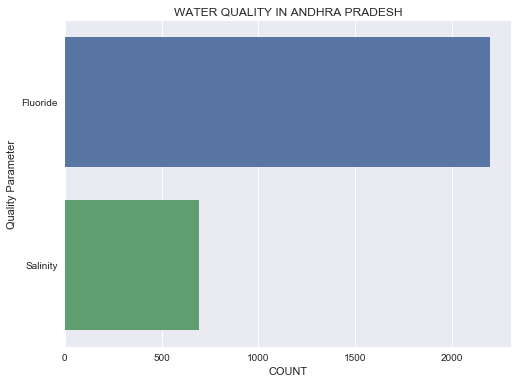

In [115]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=ANDHRA_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ANDHRA PRADESH")
fig=ax.get_figure()
fig.savefig("andhrapradesh.png")

In [97]:
ASSAM

,State Name,Quality,Quality Parameter,count
3,ASSAM,0,Arsenic,4775
4,ASSAM,1,Fluoride,1037
5,ASSAM,2,Iron,74098


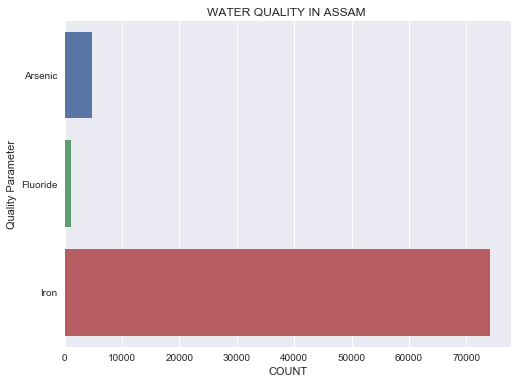

In [114]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=ASSAM)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ASSAM ")
fig=ax.get_figure()
fig.savefig("assam.png")

In [102]:
ARUNACHAL_PRADESH

,State Name,Quality,Quality Parameter,count
2,ARUNACHAL PRADESH,2,Iron,612


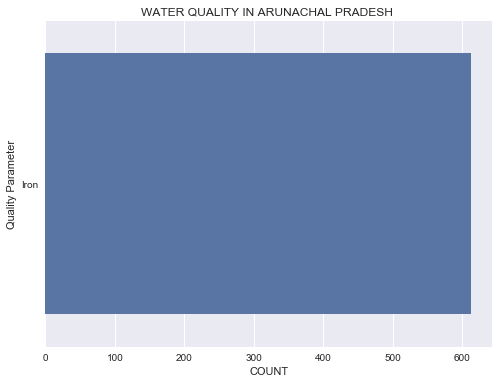

In [116]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=ARUNACHAL_PRADESH)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN ARUNACHAL PRADESH ")
fig=ax.get_figure()
fig.savefig("ARUNACHAL PRADESH.png")

In [106]:
BIHAR

,State Name,Quality,Quality Parameter,count
6,BIHAR,0,Arsenic,6215
7,BIHAR,1,Fluoride,16150
8,BIHAR,2,Iron,69970
9,BIHAR,3,Nitrate,1


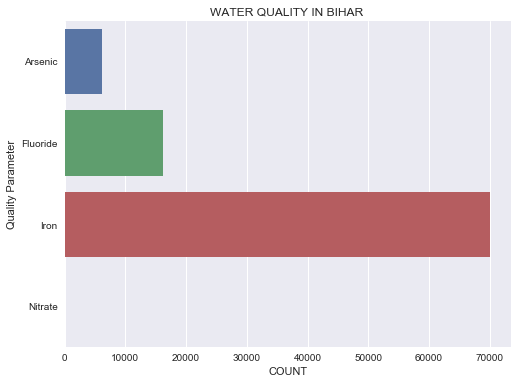

In [117]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x='count',y='Quality Parameter',data=BIHAR)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN BIHAR ")
fig=ax.get_figure()
fig.savefig("BIHAR.png")

In [111]:
GUJRAT

,State Name,Quality,Quality Parameter,count


In [112]:
#This will show error as Gujarat is empty in the given dataset
plt.figure(figsize=(8,6.40))
ax=sns.barplot(x='count',y='Quality Parameter',data=GUJRAT)
ax.set(xlabel='COUNT')
sns.despine(left=True,bottom=True)
plt.title("WATER QUALITY IN GUJRAT ")
fig=ax.get_figure()
fig.savefig("GUJRAT.png") 

ValueError: min() arg is an empty sequence